In [80]:
import folium
from folium.features import GeoJsonTooltip

In [12]:
import fiona

In [13]:
import geopandas


In [14]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import pandas as pd


import pandas as pd
import geopandas as gpd

import geopandas.tools
#from geopy.geocoders import Nominatim
#import geopy
from geopandas.tools import geocode
#from geopy.extra.rate_limiter import RateLimiter
from difflib import SequenceMatcher


import numpy as np

from shapely.geometry import Point, Polygon

In [15]:
stations_2011 = pd.read_csv('cleaned_data/stations_2011.csv')

In [16]:
stations_2011

,station,region,lat,lon
0,5th & F St NW,"Washington, DC",38.897222,-77.019347
1,14th & Harvard St NW,"Washington, DC",38.926800,-77.032200
2,Georgia & New Hampshire Ave NW,"Washington, DC",38.936684,-77.024181
3,10th & U St NW,"Washington, DC",38.917200,-77.025900
4,Adams Mill & Columbia Rd NW,"Washington, DC",38.922925,-77.042581
...,...,...,...,...
139,3000 Connecticut Ave NW / National Zoo,"Washington, DC",38.930282,-77.055599
140,Benning Rd & East Capitol St NE / Benning Rd M...,"Washington, DC",38.889935,-76.937230
141,Anacostia Ave & Benning Rd NE / River Terrace,"Washington, DC",38.896544,-76.960120
142,15th St & Massachusetts Ave SE,"Washington, DC",38.887320,-76.983569


In [17]:
washington_DC_map = gpd.read_file('shp_files/washington_dc/Washington_DC_Boundary.shp')

<AxesSubplot:>

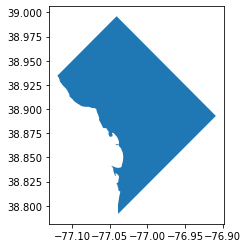

In [18]:
washington_DC_map.plot()

<AxesSubplot:>

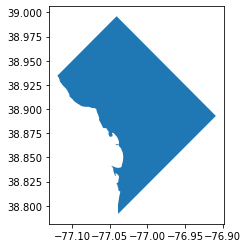

In [19]:
washington_DC_map.to_crs(epsg=4326).plot()

In [20]:
stations_2011

,station,region,lat,lon
0,5th & F St NW,"Washington, DC",38.897222,-77.019347
1,14th & Harvard St NW,"Washington, DC",38.926800,-77.032200
2,Georgia & New Hampshire Ave NW,"Washington, DC",38.936684,-77.024181
3,10th & U St NW,"Washington, DC",38.917200,-77.025900
4,Adams Mill & Columbia Rd NW,"Washington, DC",38.922925,-77.042581
...,...,...,...,...
139,3000 Connecticut Ave NW / National Zoo,"Washington, DC",38.930282,-77.055599
140,Benning Rd & East Capitol St NE / Benning Rd M...,"Washington, DC",38.889935,-76.937230
141,Anacostia Ave & Benning Rd NE / River Terrace,"Washington, DC",38.896544,-76.960120
142,15th St & Massachusetts Ave SE,"Washington, DC",38.887320,-76.983569


In [21]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(stations_2011['lon'], stations_2011['lat'])]
geo_stations_2011 = gpd.GeoDataFrame(stations_2011,crs = crs, geometry = geometry)

/opt/anaconda3/envs/geo_pandas_new/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [22]:
geo_stations_2011.head()

,station,region,lat,lon,geometry
0,5th & F St NW,"Washington, DC",38.897222,-77.019347,POINT (-77.01935 38.89722)
1,14th & Harvard St NW,"Washington, DC",38.926800,-77.032200,POINT (-77.03220 38.92680)
2,Georgia & New Hampshire Ave NW,"Washington, DC",38.936684,-77.024181,POINT (-77.02418 38.93668)
3,10th & U St NW,"Washington, DC",38.917200,-77.025900,POINT (-77.02590 38.91720)
4,Adams Mill & Columbia Rd NW,"Washington, DC",38.922925,-77.042581,POINT (-77.04258 38.92292)


Text(0.5, 1.0, 'Capital Bike Share Stations in 2011')

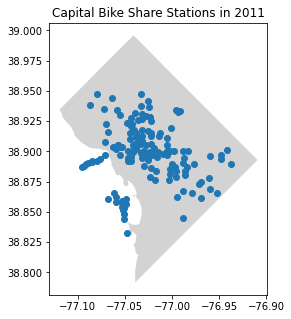

In [23]:
fig, ax = plt.subplots(figsize = (5,5))
washington_DC_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_stations_2011.plot(ax=ax)
ax.set_title('Capital Bike Share Stations in 2011')

In [24]:
df_2011 = pd.read_csv('cleaned_data/df_2011.csv')

In [25]:
df_2011_start = pd.DataFrame(df_2011.groupby('start_station').count()['duration']).rename(columns = {'duration': 'count'})
df_2011_start = df_2011_start.sort_values(by = 'count', ascending=False)

In [26]:
df_2011_start.head(10)

,count
start_station,
Massachusetts Ave & Dupont Circle NW,49093
15th & P St NW,32884
Columbus Circle / Union Station,32058
Adams Mill & Columbia Rd NW,29964
17th & Corcoran St NW,28160
14th & V St NW,25222
New Hampshire Ave & T St NW,24074
20th St & Florida Ave NW,23971
14th & Rhode Island Ave NW,23871


In [27]:
df_2011_start.reset_index(inplace=True)

In [28]:
df_2011_start.head()

,start_station,count
0,Massachusetts Ave & Dupont Circle NW,49093
1,15th & P St NW,32884
2,Columbus Circle / Union Station,32058
3,Adams Mill & Columbia Rd NW,29964
4,17th & Corcoran St NW,28160


In [29]:
df_2011_end = pd.DataFrame(df_2011.groupby('end_station').count()['duration']).rename(columns = {'duration': 'count'})
df_2011_end = df_2011_end.sort_values(by = 'count', ascending=False)

In [30]:
df_2011_end.reset_index(inplace = True)

In [31]:
df_2011_end.head(10)

,end_station,count
0,Massachusetts Ave & Dupont Circle NW,53910
1,15th & P St NW,36638
2,Columbus Circle / Union Station,32252
3,17th & Corcoran St NW,29103
4,Adams Mill & Columbia Rd NW,26248
5,8th & H St NW,25384
6,21st & I St NW,25283
7,14th & V St NW,25139
8,14th & Rhode Island Ave NW,24525
9,USDA / 12th & Independence Ave SW,24281


In [32]:
stations_2011.head()

,station,region,lat,lon,geometry
0,5th & F St NW,"Washington, DC",38.897222,-77.019347,POINT (-77.01935 38.89722)
1,14th & Harvard St NW,"Washington, DC",38.926800,-77.032200,POINT (-77.03220 38.92680)
2,Georgia & New Hampshire Ave NW,"Washington, DC",38.936684,-77.024181,POINT (-77.02418 38.93668)
3,10th & U St NW,"Washington, DC",38.917200,-77.025900,POINT (-77.02590 38.91720)
4,Adams Mill & Columbia Rd NW,"Washington, DC",38.922925,-77.042581,POINT (-77.04258 38.92292)


In [33]:
stations_2011 = stations_2011.merge(df_2011_start, how = 'left', left_on = 'station', right_on = 'start_station')
stations_2011.rename(columns = {'count': 'start_count'}, inplace = True)

In [34]:
stations_2011 = stations_2011.merge(df_2011_end, how = 'left', left_on = 'station', right_on = 'end_station')
stations_2011.rename(columns = {'count': 'end_count'}, inplace = True)

In [35]:
stations_2011.drop(['start_station', 'end_station'], axis = 1, inplace = True)

In [36]:
stations_2011.head()

,station,region,lat,lon,geometry,start_count,end_count
0,5th & F St NW,"Washington, DC",38.897222,-77.019347,POINT (-77.01935 38.89722),14942,16137
1,14th & Harvard St NW,"Washington, DC",38.926800,-77.032200,POINT (-77.03220 38.92680),17507,12877
2,Georgia & New Hampshire Ave NW,"Washington, DC",38.936684,-77.024181,POINT (-77.02418 38.93668),10045,7308
3,10th & U St NW,"Washington, DC",38.917200,-77.025900,POINT (-77.02590 38.91720),16737,17247
4,Adams Mill & Columbia Rd NW,"Washington, DC",38.922925,-77.042581,POINT (-77.04258 38.92292),29964,26248


In [37]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(stations_2011['lon'], stations_2011['lat'])]
geo_stations_2011 = gpd.GeoDataFrame(stations_2011,crs = crs, geometry = geometry)

/opt/anaconda3/envs/geo_pandas_new/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


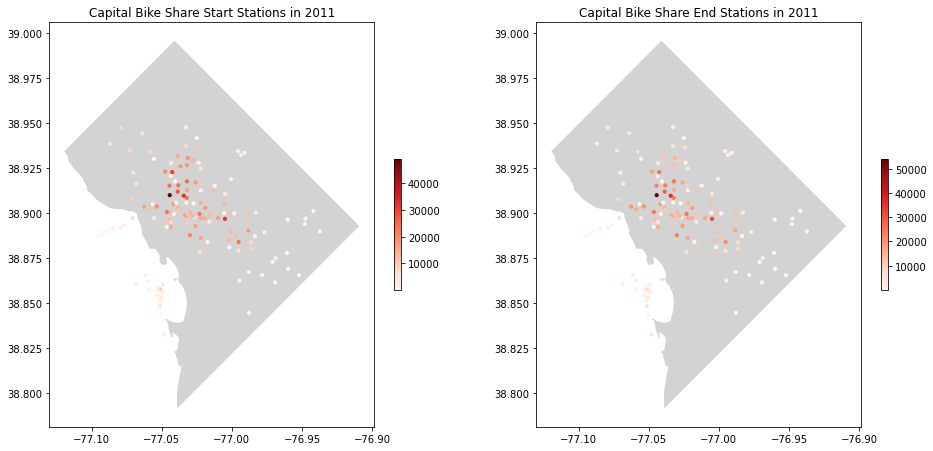

In [38]:
fig, ax = plt.subplots(1,2, figsize = (16,8))
washington_DC_map.to_crs(epsg=4326).plot(ax=ax[0], color='lightgrey')
geo_stations_2011.plot(column = 'start_count', ax=ax[0], cmap = 'Reds', legend = True, legend_kwds={'shrink': 0.3}, markersize = 10)
ax[0].set_title('Capital Bike Share Start Stations in 2011')

washington_DC_map.to_crs(epsg=4326).plot(ax=ax[1], color='lightgrey')
geo_stations_2011.plot(column = 'end_count', ax=ax[1], cmap = 'Reds', legend = True, legend_kwds={'shrink': 0.3}, markersize = 10)
ax[1].set_title('Capital Bike Share End Stations in 2011')
plt.show()

In [39]:
# Import maps for DC, Arlington, and Alexandria
gdf1 = gpd.read_file('shp_files/washington_dc/Washington_DC_Boundary.shp')
gdf2 = gpd.read_file('shp_files/arlington/County_poly.shp')
gdf3 = gpd.read_file('shp_files/alexandria/Boundary.shp')

In [40]:
# Convert CRS
gdf1 = gdf1.to_crs(epsg=4326)
gdf2 = gdf2.to_crs(epsg=4326)
gdf3 = gdf3.to_crs(epsg=4326)

In [41]:
# Concatenate into a single geodataframe
gdf = gpd.GeoDataFrame(pd.concat([gdf1, gdf2, gdf3]))

<AxesSubplot:>

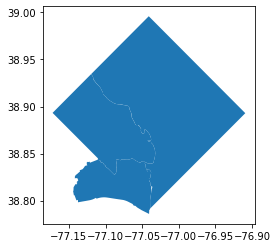

In [42]:
gdf.plot()

In [43]:
# Import file for bike trails
dc_bike_trails = gpd.read_file('shp_files/washington_dc/bike_trails/Bike_Trails.shp')

In [44]:
# Convert CRS
dc_bike_trails = dc_bike_trails.to_crs(epsg=4326)

<AxesSubplot:>

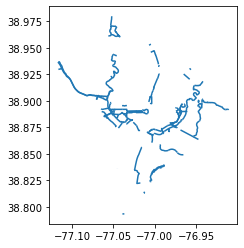

In [45]:
dc_bike_trails.plot()

In [46]:
# Import file for DC metro stations
dc_metro_stops = gpd.read_file('shp_files/washington_dc/metro_stations/Metro_Stations_Regional.shp')

# Convert CRS
dc_metro_stops = dc_metro_stops.to_crs(epsg=4326)


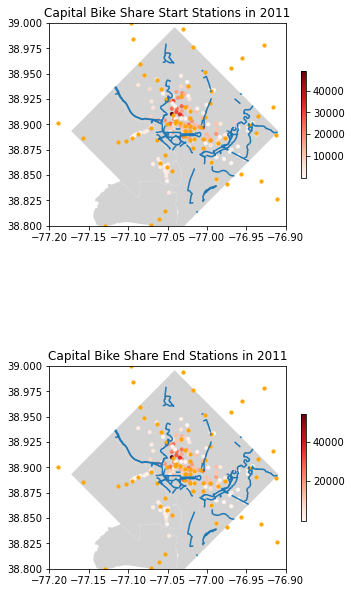

In [57]:
# Now plot with bike station points

fig, ax = plt.subplots(2,1, figsize = (5,10))
gdf.to_crs(epsg=4326).plot(ax=ax[0], color='lightgrey')
geo_stations_2011.plot(column = 'start_count', ax=ax[0], cmap = 'Reds', legend = True, legend_kwds={'shrink': 0.3}, markersize = 10)
dc_bike_trails.plot(ax = ax[0])
dc_metro_stops.plot(ax = ax[0], c = 'orange', markersize = 10)
ax[0].set_title('Capital Bike Share Start Stations in 2011')
ax[0].set_xlim([-77.2, -76.9])
ax[0].set_ylim([38.8, 39])

gdf.to_crs(epsg=4326).plot(ax=ax[1], color='lightgrey')
geo_stations_2011.plot(column = 'end_count', ax=ax[1], cmap = 'Reds', legend = True, legend_kwds={'shrink': 0.3}, markersize = 10)
dc_bike_trails.plot(ax = ax[1])
dc_metro_stops.plot(ax = ax[1], c = 'orange', markersize = 10)
ax[1].set_title('Capital Bike Share End Stations in 2011')
ax[1].set_xlim([-77.2, -76.9])
ax[1].set_ylim([38.8, 39])

plt.tight_layout()
plt.show()

In [54]:

latitude = 38.9
longitude = -77

DC_map = folium.Map(location = [latitude, longitude], zoom_start = 15)

In [56]:
#DC_map

In [60]:
geo_stations_2011.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [62]:
geo_stations_2011.to_crs(3857).area.sum()

0.0

In [88]:
map_2011 = geo_stations_2011.explore(column = 'start_count', cmap = 'seismic', vmin = 1000, vmax = 30000)
folium.LayerControl().add_to(map_2011)
map_2011

In [73]:
map_2011.save('DC_map_2011.html')

In [81]:
m = folium.Map(location = [38.9072, - 77.0369], tiles = "Stamen Terrain", zoom_start = 15)
m

In [79]:
m = folium.Map(location = [38.9072, - 77.0369], tiles = "Stamen Terrain", zoom_start = 15)
cpleth = folium.Choropleth(geo_stations_2011, data = geo_stations_2011, 
                            key_on = 'feature.properties.station', 
                            columns = ['station', 'start_count'],
                            fill_color = 'RdYlGn',
                            legend_name = 'Count as start station')
cpleth.add_to(m)
folium.LayerControl().add_to(m)
m